plots of 5x5 model run
- 5 x 5 x 101 domain
- 5 days
- river on

In [1]:
import os
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#f=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/runSOG_02/SalishSea_1h_20041019_20041023_ptrc_T.nc')
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SS5x5_00/SS5x5_1h_20041019_20041019_grid_T.nc')
fu=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SS5x5_00/SS5x5_1h_20041019_20041019_grid_U.nc')
fv=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SS5x5_00/SS5x5_1h_20041019_20041019_grid_V.nc')
fw=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SS5x5_00/SS5x5_1h_20041019_20041019_grid_W.nc')
fkeys=f.variables.keys()
fkeysu=fu.variables.keys()
fkeysv=fv.variables.keys()
fkeysw=fw.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=(f.variables['time_counter'][:])
xx,zz=np.meshgrid(lons,-z[:])
tt,tz=np.meshgrid(t-t[0],-z[:])
xt,yt=np.meshgrid(lons,lats)

In [3]:
print(fkeys)
print(fkeysu)
print(fkeysv)
print(fkeysw)

KeysView(OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (5, 5)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (5, 5)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (101,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (101, 2)
filling off
), ('sossheig', <class 'netCDF4._netCDF4.Variable'>
float32 sossheig(time_counter, y, x)
    standard_name: sea_surface_heigh

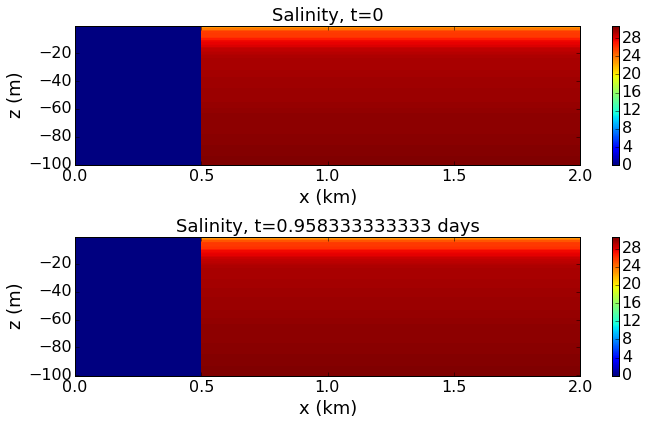

In [4]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f.variables['vosaline'][0,:,2,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
axs[0].autoscale(tight='True')
#axs[0].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f.variables['vosaline'][-1,:,2,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=' + str((t[-1]-t[0])/3600/24) + ' days', fontsize=18)
axs[1].autoscale(tight='True')
#axs[1].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

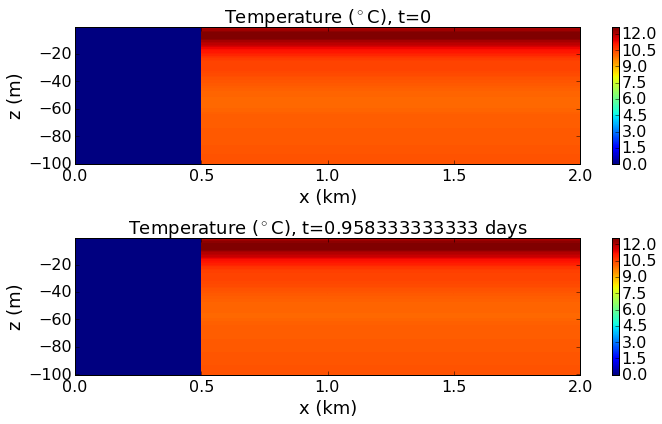

In [5]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f.variables['votemper'][0,:,2,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
axs[0].autoscale(tight='True')
#axs[0].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f.variables['votemper'][-1,:,2,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=' + str((t[-1]-t[0])/3600/24) + ' days', fontsize=18)
axs[1].autoscale(tight='True')
#axs[1].axis([0, lons[-1], -z[-1], 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()


votemper
vosaline
buoy_n2


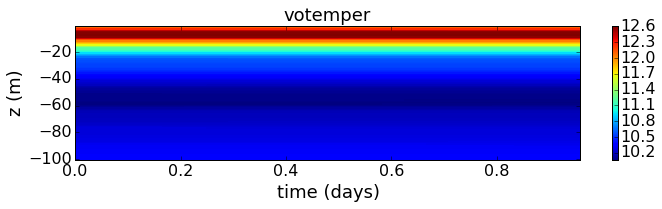

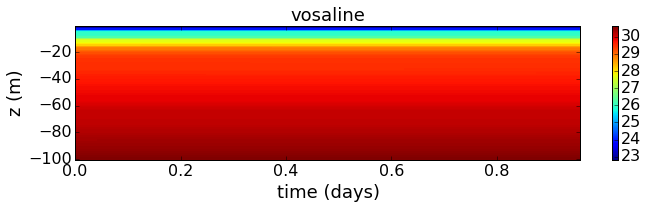

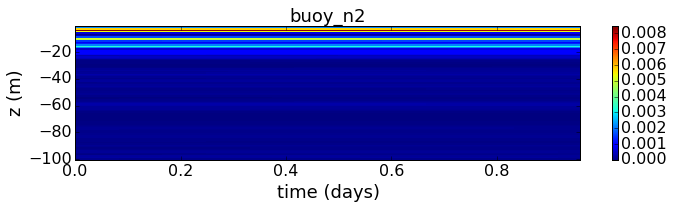

In [6]:

for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig=plt.figure(figsize=(10,3))
        axs = plt.axes()
        print( ik)
        mesh0=axs.pcolormesh(tt/3600/24,tz,f.variables[ik][:,:,2,2].conj().transpose())
        cb=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('z (m)', fontsize=18)
        axs.set_xlabel('time (days)', fontsize=18)
        axs.set_title(ik, fontsize=18)
        axs.autoscale(tight='True')
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb.ax.tick_params(labelsize=16)
        plt.tight_layout()

vozocrtx


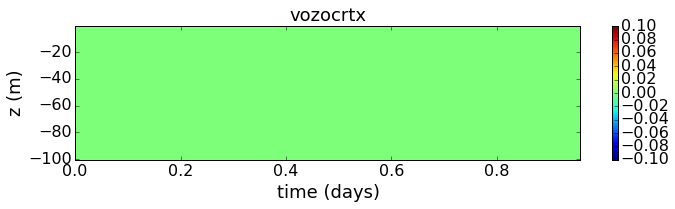

In [7]:
for ik in fkeysu:
    if np.size(fu.variables[ik].shape) == 4:
        fig=plt.figure(figsize=(10,3))
        axs = plt.axes()
        print( ik)
        mesh0=axs.pcolormesh(tt/3600/24,tz,fu.variables[ik][:,:,2,2].conj().transpose())
        cb=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('z (m)', fontsize=18)
        axs.set_xlabel('time (days)', fontsize=18)
        axs.set_title(ik, fontsize=18)
        axs.autoscale(tight='True')
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb.ax.tick_params(labelsize=16)
        plt.tight_layout()
fu.close()

vomecrty


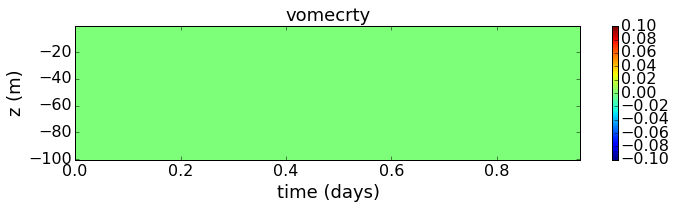

In [8]:
for ik in fkeysv:
    if np.size(fv.variables[ik].shape) == 4:
        fig=plt.figure(figsize=(10,3))
        axs = plt.axes()
        print( ik)
        mesh0=axs.pcolormesh(tt/3600/24,tz,fv.variables[ik][:,:,2,2].conj().transpose())
        cb=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('z (m)', fontsize=18)
        axs.set_xlabel('time (days)', fontsize=18)
        axs.set_title(ik, fontsize=18)
        axs.autoscale(tight='True')
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb.ax.tick_params(labelsize=16)
        plt.tight_layout()
fv.close()

vovecrtz
vert_eddy_diff
vert_eddy_visc
dissipation


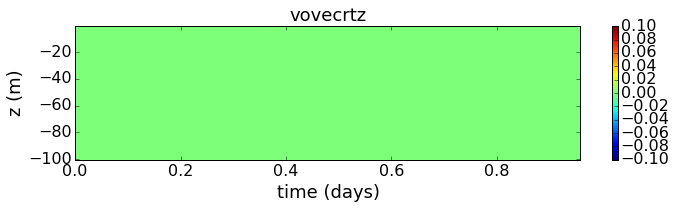

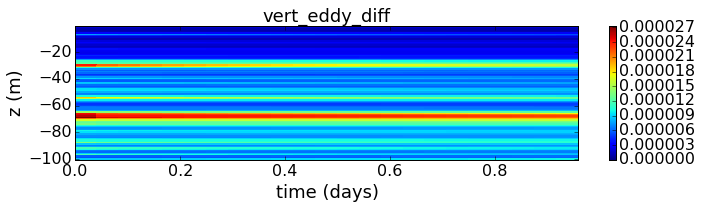

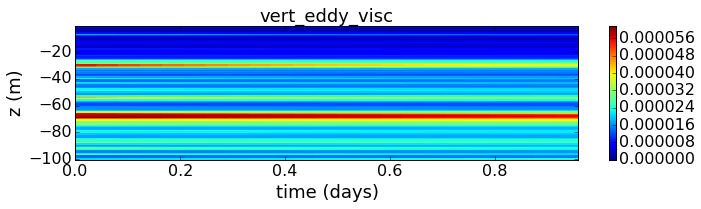

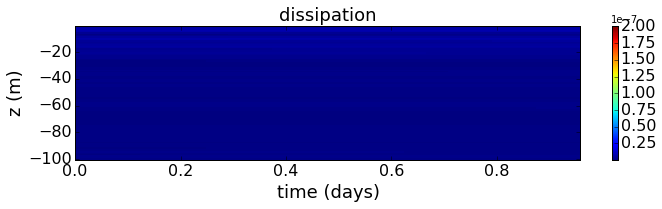

In [9]:
for ik in fkeysw:
    if np.size(fw.variables[ik].shape) == 4:
        fig=plt.figure(figsize=(10,3))
        axs = plt.axes()
        print( ik)
        mesh0=axs.pcolormesh(tt/3600/24,tz,fw.variables[ik][:,:,2,2].conj().transpose())
        cb=fig.colorbar(mesh0,ax=axs)
        axs.set_ylabel('z (m)', fontsize=18)
        axs.set_xlabel('time (days)', fontsize=18)
        axs.set_title(ik, fontsize=18)
        axs.autoscale(tight='True')
        plt.setp(axs.get_xticklabels(),fontsize=16)
        plt.setp(axs.get_yticklabels(),fontsize=16)
        cb.ax.tick_params(labelsize=16)
        plt.tight_layout()
fw.close()